<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/Structured_Dataset/blob/main/iris_flowers_dataset%5Bmlc%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Description**

* This dataset have all of the 4 input variables in numeric and have the same scale in centimeters. 

* Each instance describes the properties of an observed flower measurements and the output variable is specific iris species.

* This is a multi-class classification problem, meaning that there are more than two classes to be predicted, in fact there are three flower species. 

* This is an important type of problem on which to practice with neural networks because the three class values require specialized handling.

* The iris flower dataset is a well-studied problem and a such we can expect to achieve a model accuracy in the range of 95% to 97%. This provides a good target to aim for when developing our models.

###Import Classes and Functions

In [56]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# load dataset
dataframe = pd.read_csv("/content/iris flowers dataset.csv", header=None)
dataset = dataframe.values
dataset[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [58]:
# creating the data feaure and label:
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

###Encode The Output Variable

In [59]:
# #importing the function one hot encoder
# from sklearn.preprocessing import OneHotEncoder


# label_reshape=np.reshape(Y, [-1,1])
# OneHotEncode= OneHotEncoder(sparse=False)
# labels= OneHotEncode.fit_transform(label_reshape)
# labels[:10],labels.shape

In [60]:
from sklearn.preprocessing import LabelEncoder
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

encoder,encoded_Y

(LabelEncoder(),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [61]:
# convert integers to dummy variables (i.e. one hot encoded)
one_hot = tf.keras.utils.to_categorical(encoded_Y)
one_hot[:4],one_hot.shape

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32), (150, 3))

In [62]:
## train and test spliting:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,one_hot,test_size=.20)


x_train.shape,y_train.shape,x_test.shape,y_test.shape

((120, 4), (120, 3), (30, 4), (30, 3))

In [63]:
## callback
# Create a function to implement a ModelCheckpoint callback with a specific filename 
callbacks= tf.keras.callbacks.ModelCheckpoint(filepath=("/content/callback/dataset_banknote_model"), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True)

# Create a function to implement a Earlystop callback with loss monitor)
Early_stop=tf.keras.callbacks.EarlyStopping( monitor='loss',
                                             patience=10,
                                             verbose=0)

## Define The Neural Network Model

In [64]:
# define baseline model

# create model
model = tf.keras.Sequential([
                                tf.keras.layers.Dense(8, input_dim=4, activation='relu'),
                                tf.keras.layers.Dense(3, activation='softmax')
                            ])
# Compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=250, batch_size=32, verbose=0,callbacks=[Early_stop])



In [65]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.2144 - accuracy: 1.0000


[0.21444448828697205, 1.0]

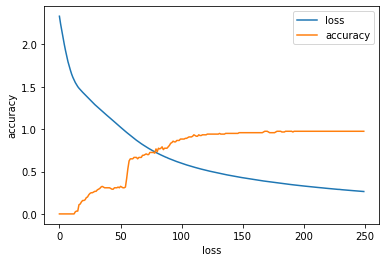

In [66]:
# plot loss and accuracy curve
pd.DataFrame(history.history).plot()
plt.ylabel("accuracy")
plt.xlabel("loss"); # note: epochs will only show 20 since we overrid the history variable


In [67]:
## model prediction on x_dataset
model_preds=model.predict(x_test)
preds=tf.math.round(model_preds)
preds[:10],y_test[:10]

(<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
 array([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]], dtype=float32)>, array([[1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.]], dtype=float32))

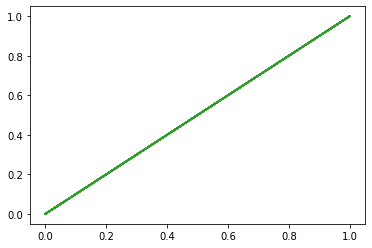

In [68]:
# plot the y_test and model_preds
plt.plot(y_test,preds);

## exact matched ie.data leakage

In [69]:
# Save a model using the SavedModel format
model.save('best_model_SavedModel_format.h5')
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format.h5")
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 40        
                                                                 
 dense_7 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [70]:
loaded_saved_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 136ms/step - loss: 0.2144 - accuracy: 1.0000


[0.21444448828697205, 1.0]

## revert the one hot encoding to original name:

In [122]:
## loop for preds:
pred_result=[]
for x in range(len(preds)):
    if preds[x][0]==1:
        pred_result.append("Iris-setosa")
        x=x+1
    elif preds[x][1]==1:
        pred_result.append("Iris-versicolor")
        x=x+1
    elif preds[x][2]==1:
        pred_result.append("Iris-virginica")
        x=x+1
    else:
        print("")

    

## loop for actual test_result:
actual_label=[]

for m in range(len(y_test)):
    if y_test[m][0]==1:
        actual_label.append("Iris-setosa")
        m=m+1
    elif y_test[m][1]==1:
        actual_label.append("Iris-versicolor")
        m=m+1
    elif y_test[m][2]==1:
        actual_label.append("Iris-virginica")
        m=m+1
    else:
        print("")

        

In [123]:
## how correct our prediction are:
pred_df = pd.DataFrame({
                        "y_true":actual_label,
                        "y_pred":pred_result
                              })
                        
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df[:]

,y_true,y_pred,pred_correct
0,Iris-setosa,Iris-setosa,True
1,Iris-versicolor,Iris-versicolor,True
2,Iris-setosa,Iris-setosa,True
3,Iris-virginica,Iris-virginica,True
4,Iris-versicolor,Iris-versicolor,True
5,Iris-setosa,Iris-setosa,True
6,Iris-versicolor,Iris-versicolor,True
7,Iris-setosa,Iris-setosa,True
8,Iris-setosa,Iris-setosa,True
9,Iris-versicolor,Iris-versicolor,True


In [ ]:
# a=pd.DataFrame(one_hot)
# a.idxmax(1)
# encoder.inverse_transform(encoded_Y)